In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

In [3]:
def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]

In [4]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. \
          Min: {input_image.numpy().min()}")
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

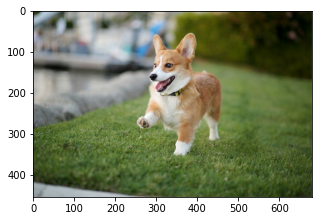

In [5]:
dog = read_and_show('datasets/prance-8.jpg')

In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet

resnet = ResNet50(weights='imagenet')

make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, dog)

Image shape: (1, 224, 224, 3). Max: 150.95443725585938.           Min: -123.68000030517578
1/1 [==============================] - 1s 692ms/step


[[('n02113023', 'Pembroke', 0.40489852),
  ('n02110806', 'basenji', 0.36418787),
  ('n02091244', 'Ibizan_hound', 0.12116792),
  ('n02113186', 'Cardigan', 0.07502401),
  ('n02085620', 'Chihuahua', 0.0057345405)]]